In [3]:
#Importando a biblioteca
import pandas as pd
#
#Leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/DIO/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/DIO/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/DIO/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/DIO/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/DIO/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx")
#
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
41,Recife,2019-02-13,157.78,981,4
23,Salvador,2019-01-01,193.20,1036,3
218,Natal,2019-01-02,189.12,1036,3
16,Salvador,2019-01-01,32.47,1036,2
186,Natal,2019-01-02,169.09,1036,2
166,Salvador,2019-01-02,111.72,1035,3
53,Salvador,2019-01-01,39.50,1035,3
43,Recife,2019-01-01,22.29,983,7
98,Recife,2019-01-01,137.34,981,8
19,Fortaleza,2019-01-01,18.86,1002,3


In [4]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [5]:
#Alterando o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')

In [7]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [11]:
#Ordenar (do maior para o maior) as ocorrencias por loja.
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

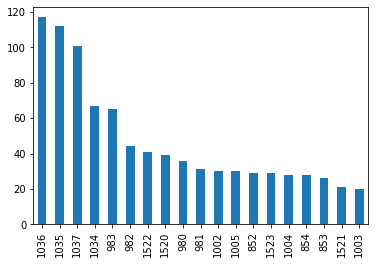

In [14]:
#Plotando gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

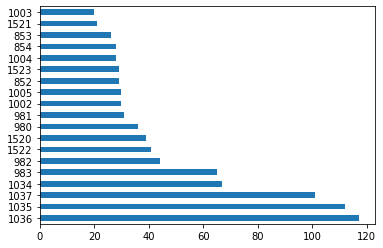

In [15]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

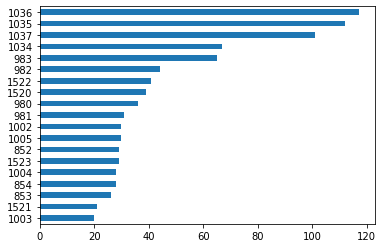

In [20]:
#Gráfico de barras horizontais / mudando ordenação
df["LojaID"].value_counts(ascending=True).plot.barh();

In [27]:
#Criando a coluna Receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
104,Aracaju,2018-01-01,46.96,1522,1,46.96
61,Fortaleza,2019-01-01,37.41,1002,5,187.05
208,Salvador,2019-01-02,39.40,1036,3,118.20
121,Natal,2019-01-02,100.70,1037,3,302.10
128,Salvador,2019-03-02,36.84,1034,1,36.84


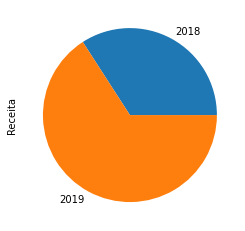

In [28]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [29]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

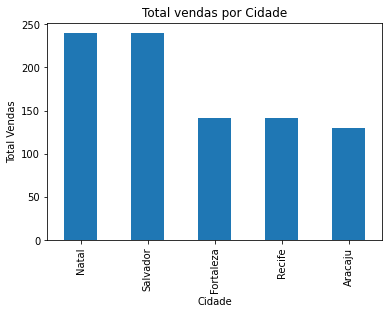

In [30]:


#Importando biblioteca Matlab Plot
import matplotlib.pyplot as plt
#
#Adicionando um título ao grafico
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
#
#Alterando o nome dos eixos
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

Text(0, 0.5, 'Total Vendas')

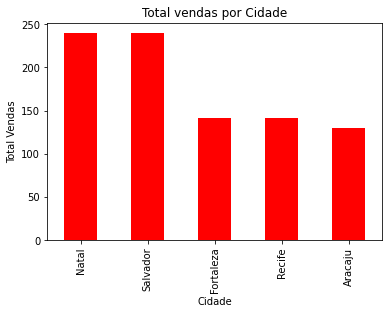

In [31]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [42]:
#Extraindo o mês e o dia
#O Pandas aceita definição de vários atributos na mesma linha
#Exempo: var1, var2, va3, ... = valor1, valor2, valor3, ...
df['Ano_venda'], df['Mes_venda'], df['Dia_venda'] = (df['Data'].dt.year, df['Data'].dt.month, df['Data'].dt.day)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,Mes_venda,Dia_venda
78,Recife,2019-01-01,238.73,980,3,716.19,2019,1,1
228,Natal,2019-01-02,6.87,1037,3,20.61,2019,1,2
100,Recife,2019-01-01,35.11,982,4,140.44,2019,1,1
52,Fortaleza,2019-01-01,15.22,1003,2,30.44,2019,1,1
50,Aracaju,2018-01-01,7.52,1522,5,37.60,2018,1,1
124,Aracaju,2018-01-01,139.64,1522,5,698.20,2018,1,1
119,Aracaju,2018-01-01,9.32,1523,6,55.92,2018,1,1
196,Salvador,2019-01-02,145.09,1036,2,290.18,2019,1,2
112,Salvador,2019-03-02,43.00,1036,3,129.00,2019,3,2
236,Natal,2019-01-03,126.29,1035,3,378.87,2019,1,3


In [43]:
#Alterando o estilo
plt.style.use("ggplot")

In [50]:
#Agrupando por Mẽs de venda
df.groupby(df['Mes_venda'])['Qtde'].sum()

Mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

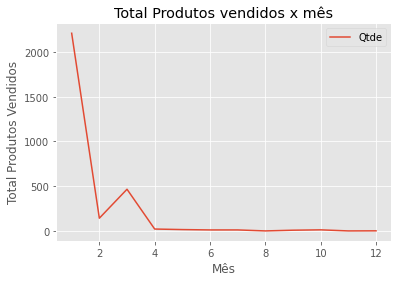

In [46]:
#Gráfico de produtos por Mẽs
df.groupby(df["Mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

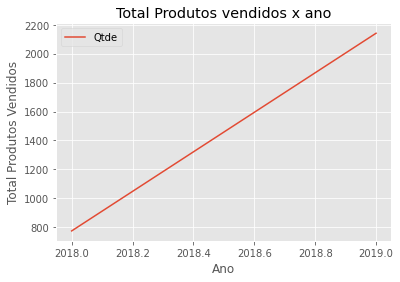

In [47]:
#Gráfico de produtos por Ano
df.groupby(df["Ano_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x ano")
plt.xlabel("Ano")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

In [54]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_venda"] == 2019]

In [56]:
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum()

Mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

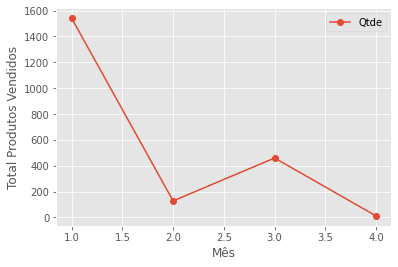

In [57]:
#Total produtos vendidos por mês no ano de 2019
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

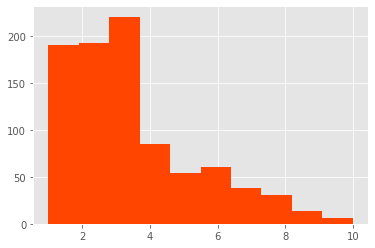

In [58]:
#Histograma
plt.hist(df["Qtde"], color="orangered");

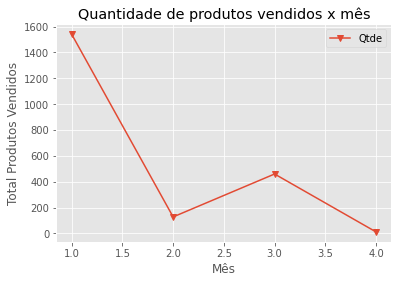

In [59]:

#Salvando em png
#O arquivo será salvo no mesmo diretório onde esta sendo executado o notebook
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")